In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Sales_Dataset.csv")
df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
...,...,...,...,...,...,...,...,...,...,...,...,...
1189,B-26370,8825,3594,15,Furniture,Tables,Debit Card,2024-07-31,Megan Mclean,New York,New York City,2024-07
1190,B-26298,2082,642,8,Electronics,Phones,EMI,2020-06-02,Caitlin Hunt,New York,Rochester,2020-06
1191,B-26298,2082,642,8,Electronics,Phones,EMI,2022-12-15,Jenna Holland,Texas,Austin,2022-12
1192,B-26298,2082,642,8,Electronics,Phones,EMI,2020-08-07,Stephanie Oconnell,New York,Buffalo,2020-08


In [5]:
df.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64

In [9]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
print("Duplicated Order Ids: ", df['Order ID'].duplicated().sum())

Duplicated Order Ids:  647


In [12]:
dupes = df[df.duplicated(keep = False)]
print(dupes.head())

Empty DataFrame
Columns: [Order ID, Amount, Profit, Quantity, Category, Sub-Category, PaymentMode, Order Date, CustomerName, State, City, Year-Month]
Index: []


In [ ]:
revenue_product = df.groupby('Sub-Category')['Profit'].sum()
print(revenue_product.map('$ {:,.2f}'.format))

Sub-Category
Binders              $ 97,257.00
Bookcases           $ 118,000.00
Chairs              $ 122,892.00
Electronic Games    $ 148,454.00
Laptops             $ 110,260.00
Markers             $ 174,749.00
Paper               $ 149,723.00
Pens                $ 129,846.00
Phones              $ 113,607.00
Printers            $ 146,259.00
Sofas               $ 142,854.00
Tables              $ 156,796.00
Name: Profit, dtype: object


In [20]:
revenue_category = df.groupby('Category')['Profit'].sum()
print(revenue_category.map('${:,.2f}'.format))

Category
Electronics        $518,580.00
Furniture          $540,542.00
Office Supplies    $551,575.00
Name: Profit, dtype: object


In [23]:
revenue_state = df.groupby('State')['Profit'].sum()
print(revenue_state.map('${:,.2f}'.format))

State
California    $278,814.00
Florida       $308,706.00
Illinois      $240,372.00
New York      $308,506.00
Ohio          $216,519.00
Texas         $257,780.00
Name: Profit, dtype: object


In [24]:
revenue_city = df.groupby('City')['Profit'].sum()
print(revenue_city.map('${:,.2f}'.format))

City
Austin            $82,638.00
Buffalo          $111,823.00
Chicago           $80,061.00
Cincinnati        $78,788.00
Cleveland         $81,454.00
Columbus          $56,277.00
Dallas           $102,483.00
Houston           $72,659.00
Los Angeles       $69,264.00
Miami            $109,739.00
New York City     $86,954.00
Orlando          $128,125.00
Peoria            $76,106.00
Rochester        $109,729.00
San Diego        $101,444.00
San Francisco    $108,106.00
Springfield       $84,205.00
Tampa             $70,842.00
Name: Profit, dtype: object


In [26]:
monthly_revenue = df.groupby('Year-Month')['Profit'].sum()
monthly_revenue = monthly_revenue.sort_index()
print(monthly_revenue.map('${:,.2f}'.format))

Year-Month
2020-03     $6,192.00
2020-04    $36,156.00
2020-05    $24,294.00
2020-06     $9,489.00
2020-07    $12,008.00
              ...    
2024-11    $15,657.00
2024-12    $20,981.00
2025-01    $38,595.00
2025-02    $28,151.00
2025-03    $13,497.00
Name: Profit, Length: 61, dtype: object


In [31]:
best_selling = df.groupby('Sub-Category')['Quantity'].sum()
top5_best_selling = best_selling.sort_values(ascending = False ).head(5)
print(top5_best_selling)

Sub-Category
Tables              1303
Sofas               1233
Electronic Games    1220
Pens                1204
Markers             1173
Name: Quantity, dtype: int64


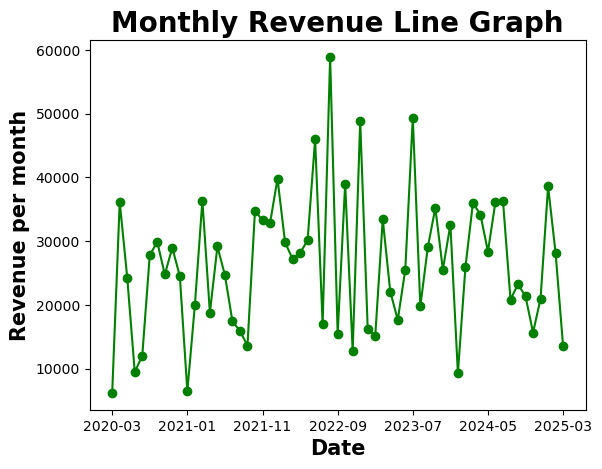

In [42]:
monthly_revenue.plot(kind= "line", color = "green", marker = 'o')
plt.title("Monthly Revenue Line Graph", fontweight = "bold", fontsize = "20")
plt.xlabel("Date", fontweight = "bold", fontsize = 15)
plt.ylabel("Revenue per month", fontweight = "bold", fontsize = 15)
plt.show()

Text(0, 0.5, 'State')

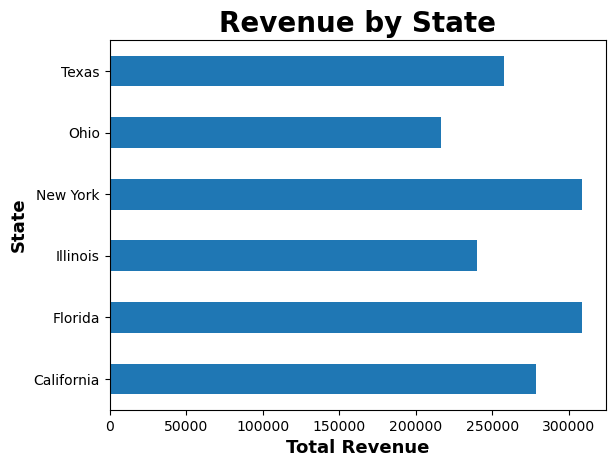

In [49]:
revenue_state.plot(kind= 'barh')
plt.title("Revenue by State", fontsize = 20, fontweight = 'bold')
plt.xlabel("Total Revenue", fontweight = 'bold', fontsize = 13)
plt.ylabel("State", fontweight = 'bold', fontsize = 13)

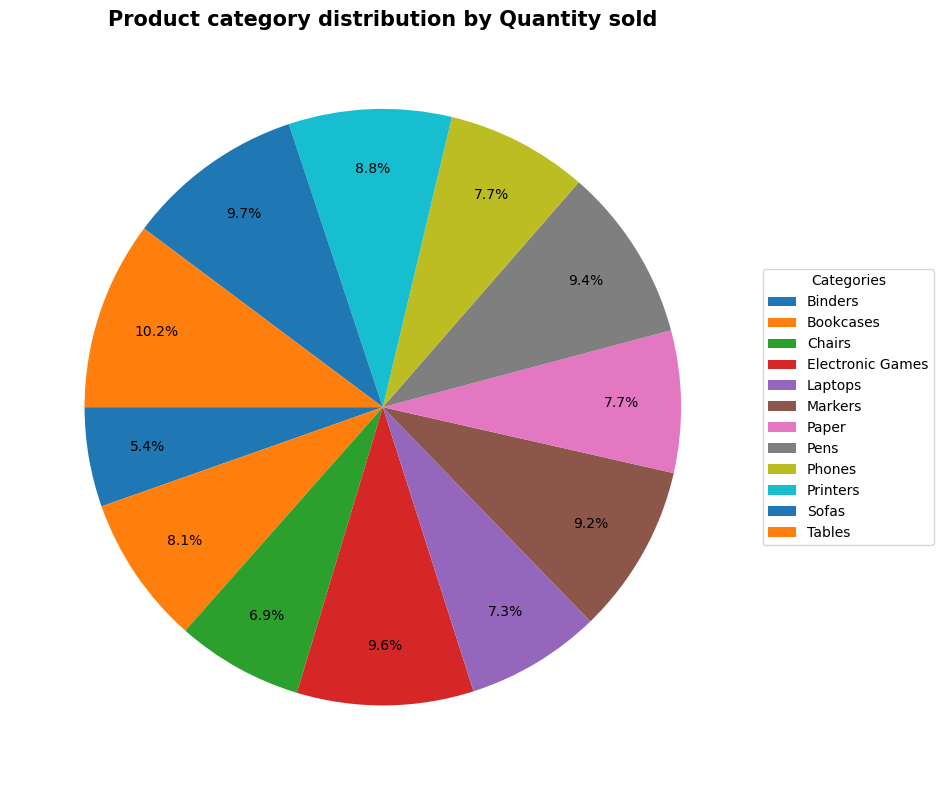

In [ ]:
product_distribution_sales = df.groupby('Sub-Category')['Quantity'].sum()

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    product_distribution_sales,
    labels=None,
    autopct='%1.1f%%',
    startangle=180,
    pctdistance=0.8,
    textprops={'fontsize': 10}
)
plt.legend(
    wedges,
    product_distribution_sales.index,
    title="Categories",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title('Product category distribution by Quantity sold', fontweight='bold', size=15)
plt.tight_layout()
plt.show()


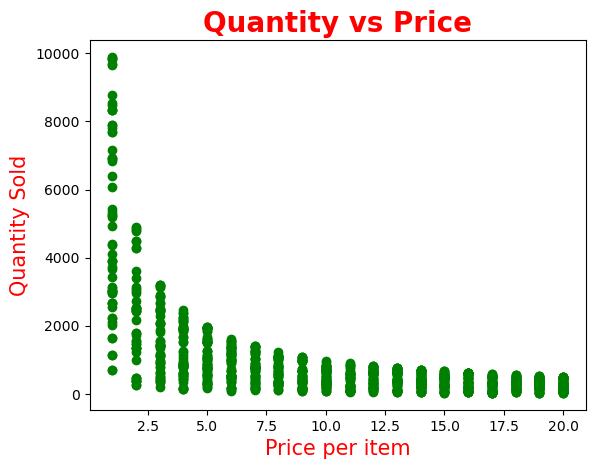

In [86]:
quantity = df['Quantity']
price_per_item = df['Amount'] / df['Quantity']
plt.scatter(quantity, price_per_item, color = 'green')
plt.title("Quantity vs Price", fontweight = 'bold', fontsize = 20, color = 'red')
plt.xlabel("Price per item", fontsize = 15, color = 'red')
plt.ylabel("Quantity Sold", fontsize = 15, color = 'red')
plt.show()